In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import classification_report , ConfusionMatrixDisplay

In [2]:
wine = pd.read_csv('data/train.csv',sep=';')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,6.6,0.3,0.36,1.2,0.035,43,126,0.9909,3.01,0.63,11.4,6,white
1,7.7,0.5,0.26,1.9,0.062,9,31,0.9966,3.39,0.64,9.6,5,red
2,8.4,0.5,0.35,2.9,0.076,21,127,0.9976,3.23,0.63,9.2,5,red
3,7.5,0.4,0.33,5.0,0.045,30,131,0.9942,3.32,0.44,10.9,6,white
4,6.4,0.2,0.25,20.2,0.083,35,157,0.9998,3.17,0.50,9.1,5,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6709,7.2,0.2,0.19,7.7,0.045,53,176,0.9958,3.17,0.38,9.5,5,white
6710,6.7,0.3,0.34,7.5,0.036,39,124,0.9912,2.99,0.32,12.4,8,white
6711,6.6,0.3,0.24,3.3,0.034,29,99,0.9903,3.10,0.40,12.3,7,white
6712,8.0,0.2,0.31,5.6,0.049,24,97,0.9930,3.10,0.42,10.9,5,white


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 0 to 6713
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6714 non-null   float64
 1   volatile acidity      6714 non-null   float64
 2   citric acid           6714 non-null   float64
 3   residual sugar        6714 non-null   float64
 4   chlorides             6714 non-null   float64
 5   free sulfur dioxide   6714 non-null   int64  
 6   total sulfur dioxide  6714 non-null   int64  
 7   density               6714 non-null   float64
 8   pH                    6714 non-null   float64
 9   sulphates             6714 non-null   float64
 10  alcohol               6714 non-null   float64
 11  quality               6714 non-null   int64  
 12  type                  6714 non-null   object 
dtypes: float64(9), int64(3), object(1)
memory usage: 682.0+ KB


In [4]:
wine.duplicated().sum()

1099

In [5]:
wine.drop_duplicates(inplace=True)
wine.duplicated().sum()

0

In [6]:
wine.type=wine.type.astype('category').cat.codes

In [7]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,5615.000000,5615.000000,5615.000000,5615.000000,5615.000000,5615.000000,5615.000000,5615.000000,5615.000000,5615.000000,5615.000000,5615.000000,5615.000000
mean,7.262547,0.353286,0.317286,5.043687,0.058406,29.582725,112.732680,0.994665,3.224816,0.539202,10.503366,5.779341,0.721638
std,1.359072,0.172410,0.151158,4.497960,0.040204,17.586446,56.592453,0.003003,0.160443,0.160472,1.185381,0.892274,0.448232
min,3.800000,0.100000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987100,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.200000,0.240000,1.800000,0.038000,16.000000,71.500000,0.992300,3.110000,0.440000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.800000,0.048000,27.000000,114.000000,0.994900,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.800000,0.400000,0.400000,7.400000,0.070000,41.000000,152.000000,0.996900,3.330000,0.610000,11.300000,6.000000,1.000000
max,15.900000,1.300000,1.660000,65.800000,0.611000,289.000000,440.000000,1.039000,4.010000,2.000000,14.900000,9.000000,1.000000


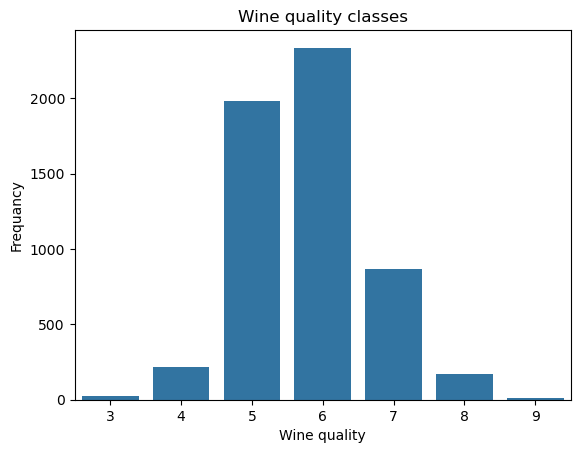

In [8]:
sns.countplot(x= wine['quality'])
plt.xlabel('Wine quality')
plt.ylabel('Frequancy')
plt.title('Wine quality classes');

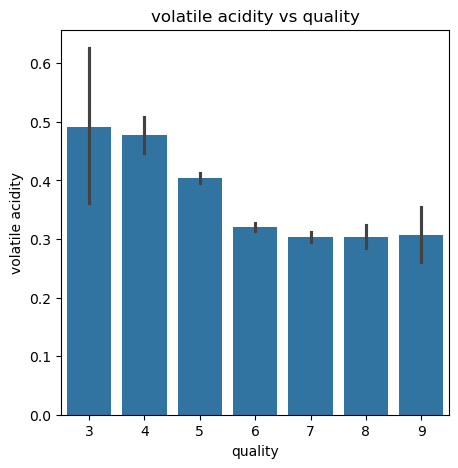

In [9]:
plot = plt.figure(figsize= (5,5))
sns.barplot(x='quality' , y= 'volatile acidity' , data= wine )
plt.title('volatile acidity vs quality');

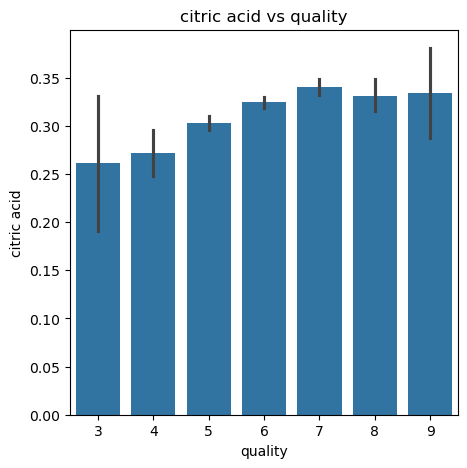

In [10]:
plot = plt.figure(figsize= (5,5))
sns.barplot(x='quality' , y= 'citric acid' , data= wine )
plt.title('citric acid vs quality');

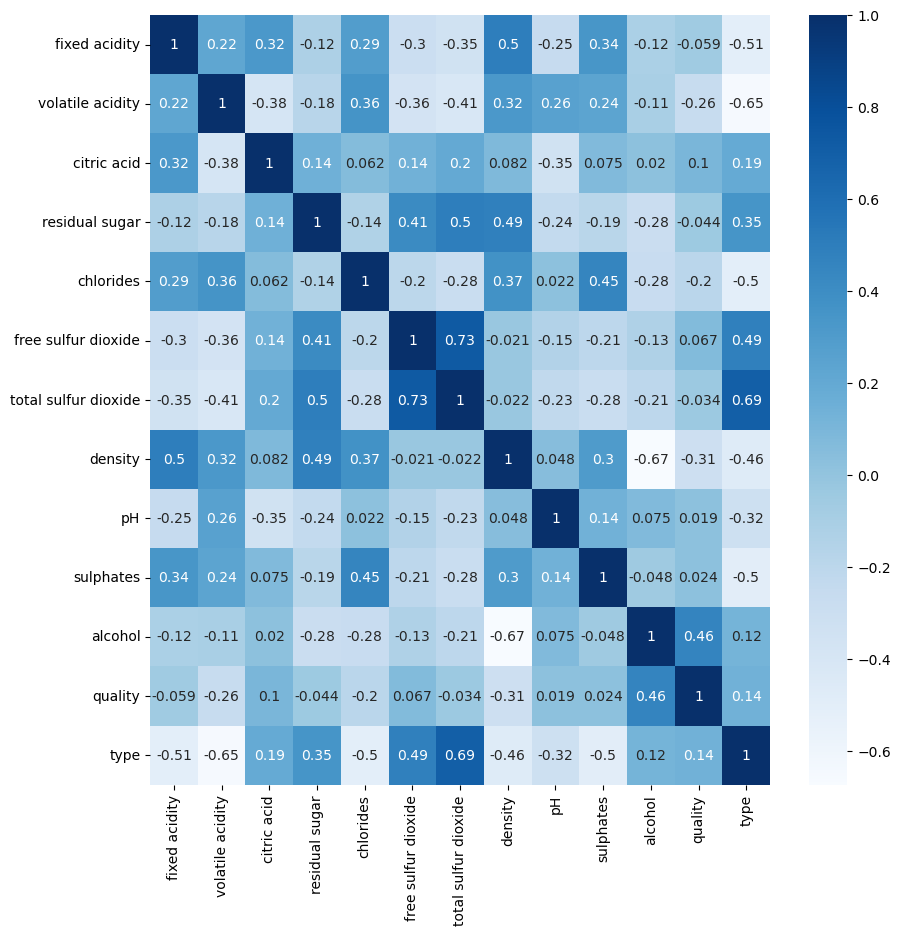

In [11]:
plt.figure(figsize=(10,10))
corr = wine.corr()
sns.heatmap(corr ,annot=True , cmap= 'Blues');

In [12]:
X_train = wine.drop(columns= ['quality','total sulfur dioxide'], axis=1)
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,type
0,6.6,0.3,0.36,1.2,0.035,43,0.9909,3.01,0.63,11.4,1
1,7.7,0.5,0.26,1.9,0.062,9,0.9966,3.39,0.64,9.6,0
2,8.4,0.5,0.35,2.9,0.076,21,0.9976,3.23,0.63,9.2,0
3,7.5,0.4,0.33,5.0,0.045,30,0.9942,3.32,0.44,10.9,1
4,6.4,0.2,0.25,20.2,0.083,35,0.9998,3.17,0.50,9.1,1
...,...,...,...,...,...,...,...,...,...,...,...
6708,7.1,0.5,0.03,2.6,0.076,21,0.9975,3.50,0.60,9.8,0
6709,7.2,0.2,0.19,7.7,0.045,53,0.9958,3.17,0.38,9.5,1
6710,6.7,0.3,0.34,7.5,0.036,39,0.9912,2.99,0.32,12.4,1
6712,8.0,0.2,0.31,5.6,0.049,24,0.9930,3.10,0.42,10.9,1


In [13]:
y_train = wine['quality'] 
y_train

0       6
1       5
2       5
3       6
4       5
       ..
6708    5
6709    5
6710    8
6712    5
6713    5
Name: quality, Length: 5615, dtype: int64

In [14]:
print("X shape:", X_train.shape)
print("y shape:", y_train.shape)

X shape: (5615, 11)
y shape: (5615,)


In [15]:
wine_test = pd.read_csv('data/test.csv', sep=';')
wine_test

,id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,1257,7.2,0.25,0.37,2.5,0.063,11.0,41.0,0.99439,3.52,0.80,12.4,red
1,6409,8.2,0.27,0.39,7.8,0.039,49.0,208.0,0.99760,3.31,0.51,9.5,white
2,136,8.9,0.32,0.49,1.6,0.050,17.0,131.0,0.99560,3.13,0.34,9.4,white
3,1631,7.4,0.16,0.30,13.7,0.056,33.0,168.0,0.99825,2.90,0.44,8.7,white
4,6084,6.4,0.28,0.56,1.7,0.156,49.0,106.0,0.99354,3.10,0.37,9.2,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,4646,6.1,0.30,0.56,2.7,0.046,46.0,184.0,0.99240,3.31,0.57,10.9,white
816,734,6.7,0.33,0.34,6.6,0.067,35.0,156.0,0.99542,3.11,0.48,9.3,white
817,5090,8.3,0.26,0.37,1.4,0.076,8.0,23.0,0.99740,3.26,0.70,9.6,red
818,1579,6.3,0.29,0.29,3.3,0.037,32.0,140.0,0.98950,3.17,0.36,12.8,white


In [16]:
wine_test.type=wine_test.type.astype('category').cat.codes

In [17]:
kaggle = wine_test['id']
wine_test = wine_test.drop('id', axis=1)

In [18]:
clf = RandomForestClassifier(random_state= 42)

In [19]:
params = {
    'max_depth': range(10 , 60 , 10),
    'n_estimators': range(25 , 100 , 25)
}
params

{'max_depth': range(10, 60, 10), 'n_estimators': range(25, 100, 25)}

In [20]:
rfc_model = GridSearchCV(
    clf,
    param_grid= params,
    cv= 5,
    n_jobs= -1,
    verbose=1
)
rfc_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 60, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [21]:
rfc_model.fit(X_train , y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 60, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [22]:
cv_results = pd.DataFrame(rfc_model.cv_results_)
cv_results.sort_values(by= 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,1.075231,0.060013,0.026726,0.003051,40,75,"{'max_depth': 40, 'n_estimators': 75}",0.569902,0.576135,0.594835,0.601069,0.614426,0.591273,0.016313,1
14,0.821139,0.030930,0.020144,0.000398,50,75,"{'max_depth': 50, 'n_estimators': 75}",0.569902,0.576135,0.594835,0.601069,0.614426,0.591273,0.016313,1
8,1.128684,0.073015,0.033907,0.004548,30,75,"{'max_depth': 30, 'n_estimators': 75}",0.568121,0.577026,0.593054,0.599288,0.613535,0.590205,0.016102,3
4,0.770871,0.016362,0.022937,0.003154,20,50,"{'max_depth': 20, 'n_estimators': 50}",0.571683,0.572573,0.588602,0.602850,0.600178,0.587177,0.013191,4
7,0.720810,0.023787,0.019745,0.000399,30,50,"{'max_depth': 30, 'n_estimators': 50}",0.562778,0.572573,0.593054,0.598397,0.607302,0.586821,0.016573,5
5,1.107144,0.058488,0.030715,0.002221,20,75,"{'max_depth': 20, 'n_estimators': 75}",0.560997,0.587711,0.595726,0.594835,0.592164,0.586287,0.012948,6
10,0.782040,0.039982,0.020145,0.000746,40,50,"{'max_depth': 40, 'n_estimators': 50}",0.560997,0.569902,0.588602,0.599288,0.609973,0.585752,0.018122,7
13,0.670948,0.035664,0.016754,0.002706,50,50,"{'max_depth': 50, 'n_estimators': 50}",0.560997,0.569902,0.588602,0.599288,0.609973,0.585752,0.018122,7
3,0.377159,0.026092,0.011568,0.001197,20,25,"{'max_depth': 20, 'n_estimators': 25}",0.564559,0.562778,0.577026,0.593054,0.601959,0.579875,0.015469,9
6,0.375563,0.035188,0.010970,0.000631,30,25,"{'max_depth': 30, 'n_estimators': 25}",0.560107,0.558326,0.578807,0.576135,0.597507,0.574176,0.014274,10


In [23]:
rfc_model.best_params_

{'max_depth': 40, 'n_estimators': 75}

In [25]:
wine_test = wine_test.drop['total sulfur dioxide']
y_predict = rfc_model.predict(wine_test)
y_predict

TypeError: 'method' object is not subscriptable

In [ ]:
b = pd.Series(y_predict)  
b.name = 'quality'

In [ ]:
submit = kaggle.to_frame().join(b)

In [ ]:
submit

In [ ]:
submit.to_csv('submit.csv', index=False)